<a href="https://colab.research.google.com/github/rachalanalytics/ETF-Performance-Exploratory-Analysis/blob/main/ETF_Performance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing ETF Performance: Short- and Long-Term Investment Strategies**

# Introduction
Exchange-Traded Funds (ETFs) are essential tools for portfolio diversification and risk management in today's financial markets. Investors often seek ETFs that offer the best balance between growth potential and risk management. However, identifying the right ETFs for short-term and long-term investment strategies can be a complex task.

In this analysis, we aim to:

- **Identify ETFs with high short-term growth potential**: We will examine the performance of ETFs over the past 3 months, focusing on metrics like quarterly returns, volatility, and momentum to pinpoint those with strong short-term performance.

- **Highlight ETFs with long-term stability**: By analyzing long-term trends, such as 200-day moving averages and historical volatility, we will identify ETFs that have demonstrated consistent growth and lower risk over extended periods.

- **Evaluate ETFs that strike the best balance between growth and risk**: We will apply a multi-factor approach to assess not only returns but also risk measures like volatility and drawdown. The goal is to highlight ETFs that offer a solid risk-return profile for investors with varying risk appetites.

By leveraging data from the top-performing ETFs on Yahoo Finance, this project aims to help investors make more informed decisions, whether they prioritize maximizing returns, minimizing risks, or balancing both.






# Methodology
We perform this analysis by going through the following steps

1. Data Aquisition: the data was scraped from yahoo finance's website and pasted into an excel file for this program to read into a dataframe
2. Data Cleaning: this is to ensure the data is ready for EDA
3. Exploratory Data Analysis: Visualizations were created to understand the distributions of ETF prices, returns, and long-term averages.
4. ETF Selection Criteria: we pinpoint the etfs with the best short-term, long-term and balanced growth to do further analysis on
5. Results and Insights: we summarise the findings and the top ETFs were visualized in a scatter plot, highlighting the one with the best balance between growth and risk.

# Initial Setup

If any libraries were not already installed in your environment, you can uncomment the pip install lines to install them.


In [ ]:
## Uncomment and run if this is the first time running it
#!pip install --upgrade gspread gspread-dataframe pandas
#!pip install plotly

#!pip install selenium
#!apt update # Update package lists
#!apt install chromium-chromedriver # Install chromium and the driver



In [ ]:
# Google Colab Authentication
from google.colab import auth
auth.authenticate_user()

# Core Libraries
import pandas as pd
import numpy as np

# Web Scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Financial Data
import yfinance as yf


# Data Aquisition

We sourced the dataset from Yahoo Finance, focusing on the most active ETFs, accessible through the following link:

https://finance.yahoo.com/markets/etfs/most-active/?start=100&count=100


For the purpose of this project, the data was automatically scraped using beautiful soup to allow for this analysis to stay up to date

In [ ]:
# Set up Chrome options for headless operation
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
dr = webdriver.Chrome(options=options)

# URL for the top 200 ETFs page
url = "https://finance.yahoo.com/markets/etfs/most-active/?start=0&count=200"


In [ ]:
# Scrape the url
dr.get(url)
print(dr.title) # Print the title to show that pulling the data worked

Most Active ETFs: ETF contracts with the highest trading volume - Yahoo Finance


In [ ]:

# Scroll the page to load more data (adjust the number of scrolls as needed)
for _ in range(10):  # Scroll 10 times, adjust as needed
    dr.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
    time.sleep(2)  # Wait for the content to load

# Extract the page source once the page has loaded
soup = BeautifulSoup(dr.page_source, 'html.parser')

# Find the table containing ETF data
table = soup.find_all('table')[0]  # Assuming the first table is the relevant ETF data table

# Extract the headers of the table
headers = [th.text.strip() for th in table.find_all('th')]

# Extract the rows of the table (skip the header row)
rows = table.find_all('tr')[1:]

etf_data = []
for row in rows:
    cells = row.find_all('td')
    data = [cell.text.strip() for cell in cells]
    etf_data.append(data)

# Create a pandas DataFrame to store the data
df = pd.DataFrame(etf_data, columns=headers)

In [ ]:
# Display the DataFrame and its information
print(df.head())
print(df.info())

  Symbol                                         Name    \
0   SPXS        Direxion Daily S&P 500 Bear 3X Shares     
1   TSLL           Direxion Daily TSLA Bull 2X Shares     
2   SOXL  Direxion Daily Semiconductor Bull 3X Shares     
3   TSLZ      T-Rex 2X Inverse Tesla Daily Target ETF     
4   TQQQ                       ProShares UltraPro QQQ     

                     Price   Change Change %   Volume 50 Day Average  \
0        6.43 0.00 (0.00%)     0.00    0.00%  93.329M           6.09   
1     26.10 -0.90 (-3.33%)    -0.90   -3.33%  80.811M          24.41   
2     28.12 +0.27 (+0.97%)    +0.27   +0.97%  77.588M          29.74   
3  2.4850 +0.0800 (+3.33%)  +0.0800   +3.33%  67.379M           3.86   
4     75.76 -0.27 (-0.36%)    -0.27   -0.36%  61.742M          81.34   

  200 Day Average 3 Month Return YTD Return 52 Wk Change % 52 Wk Range  
0            7.50         -4.53%    -42.81%        -44.76%              
1           13.36        101.97%    +99.81%        126.89%        

In [ ]:
# Close the Selenium WebDriver once done
dr.quit()

# Data Cleaning

We will go through the process of ensuring the data is ready for EDA
The steps for this are:
- Identify issues
- Clean/process the data

In [ ]:
# These statements show the structure of the dataframe so we can identify any inconsistencies in the columns

print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Symbol           200 non-null    object
 1   Name             200 non-null    object
 2                    200 non-null    object
 3   Price            200 non-null    object
 4   Change           200 non-null    object
 5   Change %         200 non-null    object
 6   Volume           200 non-null    object
 7   50 Day Average   200 non-null    object
 8   200 Day Average  200 non-null    object
 9   3 Month Return   200 non-null    object
 10  YTD Return       200 non-null    object
 11  52 Wk Change %   200 non-null    object
 12  52 Wk Range      200 non-null    object
dtypes: object(13)
memory usage: 20.4+ KB
None
       Symbol                                   Name                   Price  \
count     200                                    200  200                200   
unique    200

After looking at the data, we see that we need to standardize and clean the following:

- **Column names to lowercase and standardized** :
This makes it easier to select columns during analysis
and to make it simple to upload to a database if ever needed in the future

- **Drop the graph column** :
We get a blank column in our df when we pull from yahoo finance. This is a column that is storing the information to create a small graph next to the etf

- **Convert all numbers to a decimal format** : This makes future calculations simplified and standard

- **Clean the volume column by converting to millions** : Again, this makes future calculations simplified and standard
- **Handle missing values in 3 month return and YTD return** : Both these columns are missing information and are important indicators for if a stock is experiencing short or long term growth
- **Check for duplicates in data** : Ensures that no stocks are evaluated twice to remove any bias in the data


Outlier detection was deliberately excluded to ensure the analysis captures high-performing stocks, as outliers in this context may represent valuable investment opportunities rather than noise.

We will now clean the data with these needed changes in mind

In [ ]:
"""
Cleaning column names to lowercase and standardized
"""
# Combine all column cleaning steps in a single operation
df.columns = (df.columns
              .str.lower()              # Convert to lowercase
              .str.replace(' ', '_')    # Replace spaces with underscores
              .str.replace('%', 'pct')  # Replace '%' with 'pct'
)

# Display the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symbol            200 non-null    object
 1   name              200 non-null    object
 2                     200 non-null    object
 3   price             200 non-null    object
 4   change            200 non-null    object
 5   change_pct        200 non-null    object
 6   volume            200 non-null    object
 7   50_day_average    200 non-null    object
 8   200_day_average   200 non-null    object
 9   3_month_return    200 non-null    object
 10  ytd_return        200 non-null    object
 11  52_wk_change_pct  200 non-null    object
 12  52_wk_range       200 non-null    object
dtypes: object(13)
memory usage: 20.4+ KB
None


In [ ]:
"""
Drop the graph column
"""

# Drop columns with no title (i.e., column name is either None or an empty string)
df = df.loc[:, ~df.columns.isna() & (df.columns != '')]
df = df.drop('52_wk_range', axis=1)

# Display the updated DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symbol            200 non-null    object
 1   name              200 non-null    object
 2   price             200 non-null    object
 3   change            200 non-null    object
 4   change_pct        200 non-null    object
 5   volume            200 non-null    object
 6   50_day_average    200 non-null    object
 7   200_day_average   200 non-null    object
 8   3_month_return    200 non-null    object
 9   ytd_return        200 non-null    object
 10  52_wk_change_pct  200 non-null    object
dtypes: object(11)
memory usage: 17.3+ KB
None


In [ ]:
"""
Convert all numbers to a decimal format
The price column has a couple of different numbers in it, but we want the first number in the string
"""


# Extract the price in the price column (first set of numbers)
df['price'] = df['price'].apply(lambda x: float(re.match(r"^\d+(\.\d+)?", x).group()))

# Loop through each column to clean percentage columns
# Clean the data
for col in df.columns:
    # Skip the 'symbol' and 'name' columns, as we don't need to clean them
    if col not in ['symbol', 'name','volume']:

        # First, replace '-' or '--' (or any sequence of '-') with NaN
        df[col] = df[col].apply(lambda x: np.nan if isinstance(x, str) and re.match(r"^-+$", x) else x)

        # Convert percentage columns to float decimal format
        if df[col].dtype == 'object' and df[col].str.contains('%').any():
            df[col] = df[col].str.replace('%', '').astype(float) / 100

        # Convert other object columns to numeric (where possible)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned data
print(df.head())
print(df.info())

  symbol                                         name   price  change  \
0   SPXS        Direxion Daily S&P 500 Bear 3X Shares   6.430    0.00   
1   TSLL           Direxion Daily TSLA Bull 2X Shares  26.100   -0.90   
2   SOXL  Direxion Daily Semiconductor Bull 3X Shares  28.120    0.27   
3   TSLZ      T-Rex 2X Inverse Tesla Daily Target ETF   2.485    0.08   
4   TQQQ                       ProShares UltraPro QQQ  75.760   -0.27   

   change_pct   volume  50_day_average  200_day_average  3_month_return  \
0      0.0000  93.329M            6.09             7.50         -0.0453   
1     -0.0333  80.811M           24.41            13.36          1.0197   
2      0.0097  77.588M           29.74            39.39         -0.2540   
3      0.0333  67.379M            3.86            18.56         -0.7513   
4     -0.0036  61.742M           81.34            70.33          0.0940   

   ytd_return  52_wk_change_pct  
0     -0.4281           -0.4476  
1      0.9981            1.2689  
2     -0

In [ ]:
"""
Clean the volume column by converting to millions

By using pandas.DataFrame.head() we can see that the 'volume' column is in a format like '#.##M' and we want to standarize this

First, we need to check if there are other formats in this column to account for, then to convert the column to a float

"""

# Check all potential number formats
# Get all unique string patterns in the column

unique_patterns = df['volume'].apply(lambda x: ''.join(['#' if c.isdigit() else c for c in str(x)])).unique()

# Display the unique patterns
print(unique_patterns)

"""
We can see that all patterns are a variation of a decimal # with 'M' at the end

Because of this, we can move forward with converting them in the same way
"""

# Convert the 'volume' column to a number in the millions instead of using 'M' as a unit
df["volume"] = df["volume"].str.replace('M', '').astype(float) * 1_000_000

['##.###M' '##.##M' '#.###M' '#.##M' '#.#M']


In [ ]:
"""
Handle missing values in 3 month return and YTD return

We have decided to drop these columns since these numbers for stocks can be highly variable,
and it would not benefit the analysis to have an estimate of these numbers

df.info() also shows that there not a significant portion of stocks missing these numbers
and dropping them would mean we drop 15 out of 200 stocks only
"""
print(df.info())

# Drop rows with missing '3-month return' or 'YTD return'
df = df.dropna(subset=['3_month_return', 'ytd_return'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            200 non-null    object 
 1   name              200 non-null    object 
 2   price             200 non-null    float64
 3   change            200 non-null    float64
 4   change_pct        200 non-null    float64
 5   volume            200 non-null    float64
 6   50_day_average    200 non-null    float64
 7   200_day_average   200 non-null    float64
 8   3_month_return    197 non-null    float64
 9   ytd_return        189 non-null    float64
 10  52_wk_change_pct  200 non-null    float64
dtypes: float64(9), object(2)
memory usage: 17.3+ KB
None


In [ ]:
"""
Check for duplicates in data
"""

# This will show that there are no duplicates so no further action is needed
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [symbol, name, price, change, change_pct, volume, 50_day_average, 200_day_average, 3_month_return, ytd_return, 52_wk_change_pct]
Index: []


In [ ]:
# Showing the cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            189 non-null    object 
 1   name              189 non-null    object 
 2   price             189 non-null    float64
 3   change            189 non-null    float64
 4   change_pct        189 non-null    float64
 5   volume            189 non-null    float64
 6   50_day_average    189 non-null    float64
 7   200_day_average   189 non-null    float64
 8   3_month_return    189 non-null    float64
 9   ytd_return        189 non-null    float64
 10  52_wk_change_pct  189 non-null    float64
dtypes: float64(9), object(2)
memory usage: 17.7+ KB
None
  symbol                                         name   price  change  \
0   SPXS        Direxion Daily S&P 500 Bear 3X Shares   6.430    0.00   
1   TSLL           Direxion Daily TSLA Bull 2X Shares  26.100   -0.90   
2   SOXL  Di

# Exploratory Data Analysis

This section examines key characteristics of the dataset to identify trends and insights about top-performing ETFs. The goal is to:
- Understand the distributions of key metrics like price, returns, and volume.
- Identify relationships between variables such as price, volume, and returns.
- Identify the stocks for best short-term, and long-term growth to do deeper analysis on

We do this in 3 main steps:
- **Price Distribution and Returns Analysis**: Visualize how prices are distributed and Explore short- and long-term return distributions.
- **Correlation Matrix**: Discuss insights from correlations between key metrics.

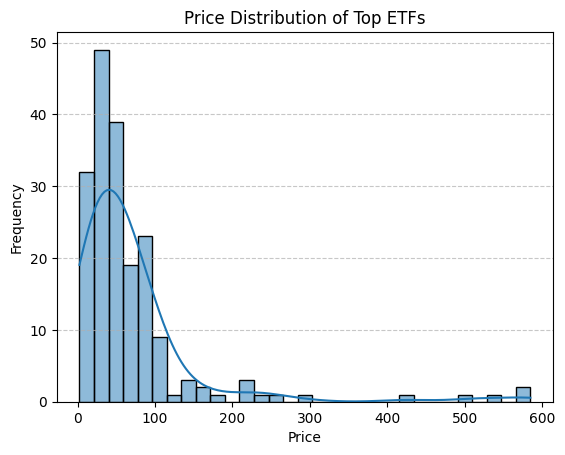

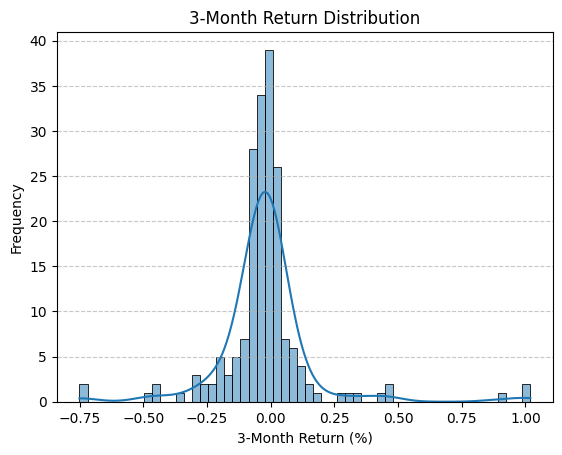

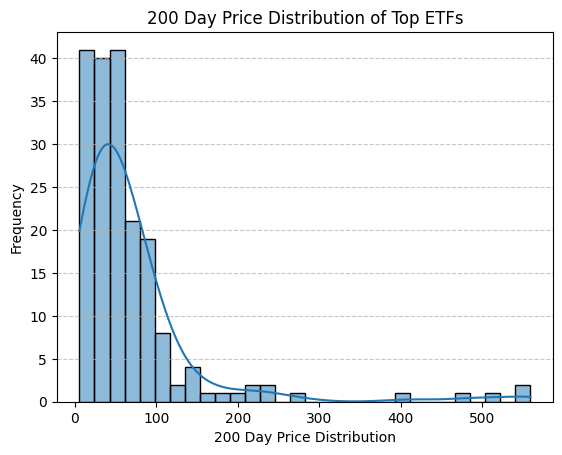

In [ ]:
"""
Price Distribution Analysis and Returns Analysis

Here, we chose to show the price distribution and the 3-month return to see
the distribution of data we are working with

We will be heavily using the 3-month, and the 200 day average

These primarily help with being more familiar with the data we working with
"""

# Visualizing price distribution to showcase how the prices are spread across the dataset
sns.histplot(df['price'], kde=True )
plt.title('Price Distribution of Top ETFs')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizing 3-month return distribution
sns.histplot(df['3_month_return'], kde=True)
plt.title('3-Month Return Distribution')
plt.xlabel('3-Month Return (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Visualizing 200 day price distribution
sns.histplot(df['200_day_average'], kde=True)
plt.title('200 Day Price Distribution of Top ETFs')
plt.xlabel('200 Day Price Distribution')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


For the price distribution of top etfs, we can see that the graph is skewed to the left, indicating that a majority of the stocks are priced under $100, with some stocks reaching up to 600.

We also see the 200 day price distribution follows a similar pattern, though is more heavily skewed to the left as well


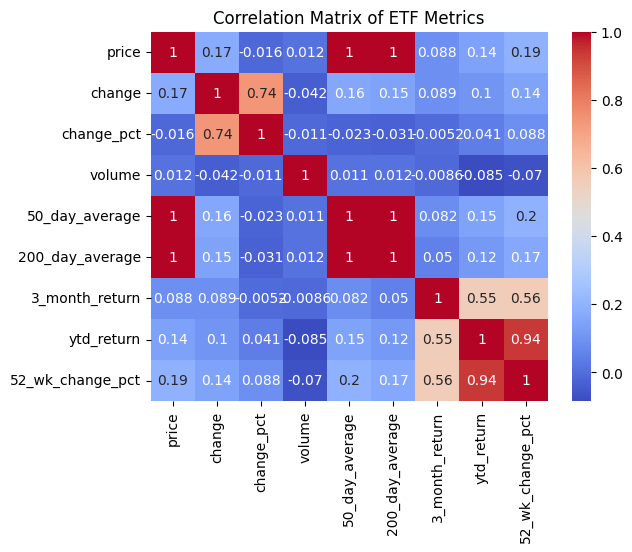

In [ ]:
"""
We continue to explore using the correlation matrix, to visualize any related variables
"""
# Correlation matrix
corr = df[['price', 'change', 'change_pct', 'volume', '50_day_average', '200_day_average', '3_month_return', 'ytd_return', '52_wk_change_pct']].corr()

# Heatmap of correlations, see how columns are correlated to each other
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of ETF Metrics')
plt.show()

# is 50 day average and 200 day average better than 3 mon and ytd

In this, we can see a correlation between 3_month_return and change_pct and ytd_return

Also, for 200 day average has a high correlation with the 'change' column. Selecting stocks at or above this amount can indicate an uptrend in pricing information

In [ ]:
# Sort by 3-month return to get the top short-term growth stocks
# Top 3-month growth stocks
top_3_month_growth = df.sort_values(by='3_month_return', ascending=False)

# Select the top 3 month growth stocks using the change_pct and the ytd_return variables because they have  high correlation with the 3 month return
top_3_month_growth = top_3_month_growth[
    (top_3_month_growth['change_pct'] > 0) &
    (top_3_month_growth['ytd_return'] > 0)  # Optional: add a threshold for ytd_return
].head(20)


In [ ]:
# Sort ETFs by YTD return, shows the ones with the good performance over the past 200 days and are likely to be the best long-term growth

"""
We chose 200 day average for long-term stocks since this is a commonly used metric in analysing long-term stocks
"""
top_ytd_growth = df.sort_values(by='200_day_average', ascending=False)

top_ytd_growth = top_ytd_growth[
    (top_ytd_growth['ytd_return'] > 0) &   # Ensure strong YTD performance
    (top_ytd_growth['change'] > 0)        # Positive change indicates upward momentum
].head(20)


Next, we have selected the top 20 stocks for short term and long term growth to do deeper analysis on
First, we use both the 30 day price average to select the top stocks with the best short-term returns and the top 200 day average price change to get the best long-term stocks

This is so we can make a call to the api and include more information on these stocks

We show bar charts to visualize the stocks we are now dealing with

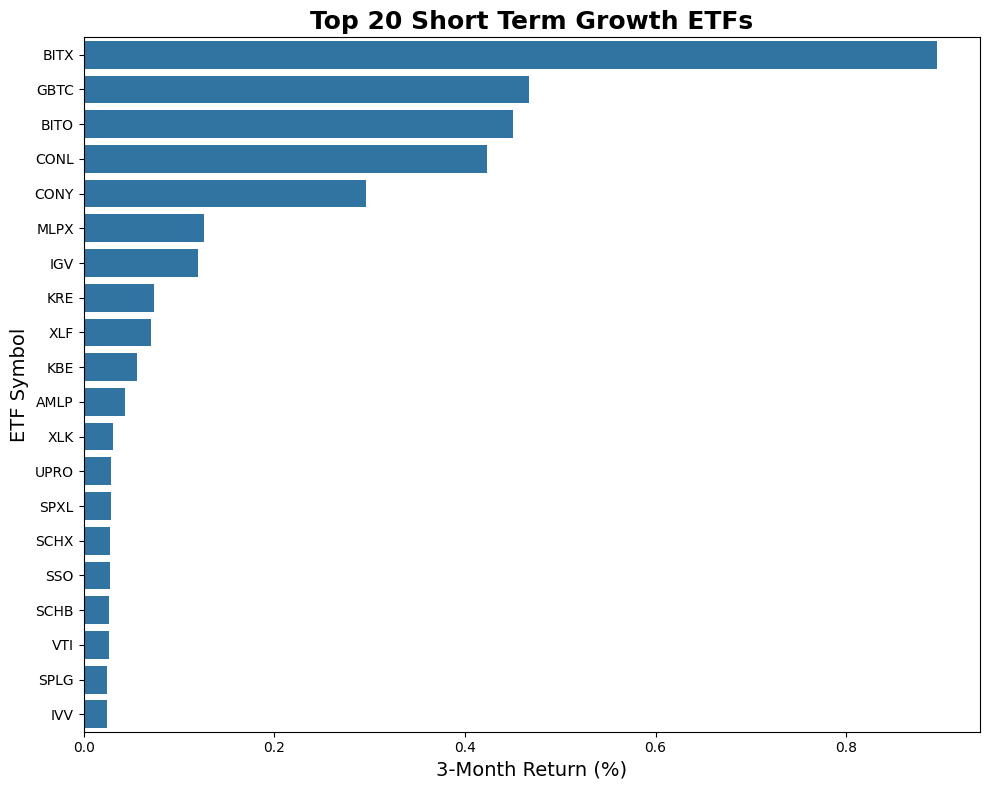

In [ ]:

# Plot settings
plt.figure(figsize=(10, 8))
sns.barplot(
    x='3_month_return',
    y='symbol',
    data=top_3_month_growth
)

# Add title and labels
plt.title('Top 20 Short Term Growth ETFs', fontsize=18, fontweight='bold')
plt.xlabel('3-Month Return (%)', fontsize=14)
plt.ylabel('ETF Symbol', fontsize=14)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

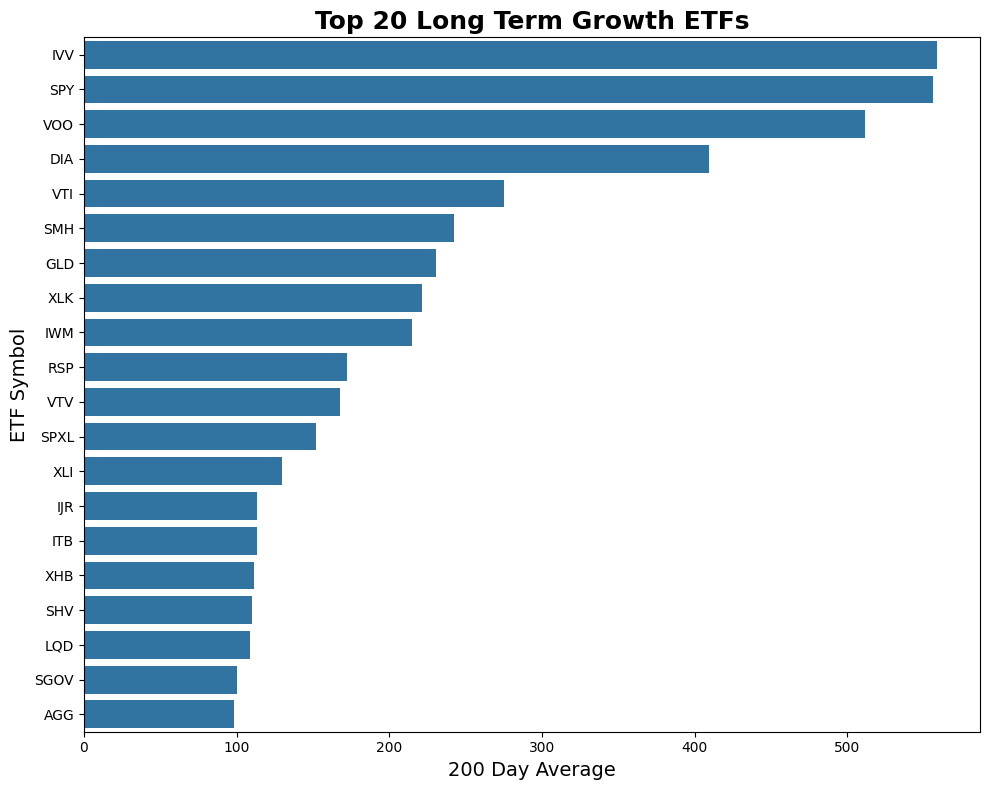

In [ ]:
# Top 10 ETFs by YTD Return best long-term growth stocks
plt.figure(figsize=(10, 8))
sns.barplot(
    x='200_day_average',
    y='symbol',
    data=top_ytd_growth
)

# Add title and labels
plt.title('Top 20 Long Term Growth ETFs', fontsize=18, fontweight='bold')
plt.xlabel('200 Day Average', fontsize=14)
plt.ylabel('ETF Symbol', fontsize=14)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

Next, for deeper analysis we gather more data points from yahoo finance such as volatility and dividend yield, and add these new columns to the short and long term stocks

In [ ]:
# Out of the etfs with the highest growth and long-term investment, find which one is the best for high growth low risk

# Function to calculate volatility for a single ETF
def get_volatility(ticker, period='1y'):
    # Fetch historical data
    data = yf.Ticker(ticker).history(period=period)

    # Calculate daily returns
    data['Daily Return'] = data['Close'].pct_change()

    # Calculate annualized volatility (standard deviation of daily returns * sqrt(252))
    volatility = data['Daily Return'].std() * np.sqrt(252)
    return volatility

# Store volatilities for all ETFs
def get_etfs_volatility(etfs, period='1y'):
    volatilities = {}
    for etf in etfs:
        try:
            volatilities[etf] = get_volatility(etf, period)
        except Exception as e:
            print(f"Error fetching data for {etf}: {e}")
            volatilities[etf] = None  # Assign None if fetching fails
    return volatilities


# Function to fetch dividend yield from Yahoo Finance for a given ETF symbol
def get_dividend_yield(ticker):
    try:
        data = yf.Ticker(ticker)
        # Check if 'dividendYield' exists and handle cases where it doesn't
        dividend_yield = data.info.get('trailingAnnualDividendYield')
        return dividend_yield
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return 0  # Return 0 if there's an error or no data

# Store dividend yields for all ETFs
def get_etfs_dividend_yield(etfs):
    dividend_yields = {}
    for etf in etfs:
        dividend_yields[etf] = get_dividend_yield(etf)
    return dividend_yields


# List of DataFrames to update
dataframes = [top_3_month_growth, top_ytd_growth]

# Loop through each DataFrame to add volatility and dividend columns
for etfs in dataframes:
    # List of ETF tickers from the DataFrame
    etf_list = etfs['symbol'].tolist()

    # Get volatilities for the ETFs
    volatility_dict = get_etfs_volatility(etf_list)

    # Get dividend yields for the ETFs
    dividend_yield_dict = get_etfs_dividend_yield(etf_list)

    # Map the volatilities to the corresponding ETFs in the DataFrame
    etfs['volatility'] = etfs['symbol'].map(volatility_dict)

    # Map the dividend yields to the corresponding ETFs in the DataFrame
    etfs['dividend'] = etfs['symbol'].map(dividend_yield_dict)

# Now, top_3_month_growth and top_ytd_growth are updated with volatility and dividend columns.


In [ ]:
top_3_month_growth.info()
top_ytd_growth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 77 to 130
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            20 non-null     object 
 1   name              20 non-null     object 
 2   price             20 non-null     float64
 3   change            20 non-null     float64
 4   change_pct        20 non-null     float64
 5   volume            20 non-null     float64
 6   50_day_average    20 non-null     float64
 7   200_day_average   20 non-null     float64
 8   3_month_return    20 non-null     float64
 9   ytd_return        20 non-null     float64
 10  52_wk_change_pct  20 non-null     float64
 11  volatility        20 non-null     float64
 12  dividend          4 non-null      float64
dtypes: float64(11), object(2)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 130 to 92
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dty

# Insights

We create an interactive scatter plot using plotly to visualize where each etf stands in terms of best growth, which is a high volatility with low risk.

In [ ]:


# Concatenate the two DataFrames along rows
etfs = pd.concat([top_3_month_growth, top_ytd_growth], ignore_index=True)

# Rank ETFs by highest 3-month return (growth) and lowest volatility (risk)
etfs_sorted_by_growth_risk = etfs.sort_values(by=['3_month_return', 'volatility'], ascending=[False, True])

# Extract the top ETF with the highest growth and lowest risk
best_growth_lowest_risk_etf = etfs_sorted_by_growth_risk.iloc[0]

# Create the interactive scatter plot
fig = px.scatter(
    etfs,
    x='volatility',
    y='3_month_return',
    color='symbol',
    hover_data={'symbol': True, 'volatility': True, '3_month_return': True},
    title='Growth vs Risk (Volatility) of ETFs'
)

# Add a special marker for the best ETF (highest growth, lowest risk)
fig.add_scatter(
    x=[best_growth_lowest_risk_etf['volatility']],
    y=[best_growth_lowest_risk_etf['3_month_return']],
    mode='markers+text',
    marker=dict(color='red', size=12, symbol='star'),
    text=['Best Growth & Lowest Risk'],
    textposition='top center',
    name='Best Growth & Lowest Risk'
)

# Show the plot
fig.show()

# Print the ETF with the highest growth and lowest risk
print("ETF with the highest growth and lowest risk:")
print(best_growth_lowest_risk_etf)

print("Top 10 ETFs with the Highest Reward and Lowest Risk:")
print(etfs_sorted_by_growth_risk[['symbol', '3_month_return', 'volatility']].head(10))


ETF with the highest growth and lowest risk:
symbol                                 BITX
name                2x Bitcoin Strategy ETF
price                                 54.26
change                                 3.05
change_pct                           0.0596
volume                            6185000.0
50_day_average                        54.14
200_day_average                       39.79
3_month_return                       0.8955
ytd_return                           1.6527
52_wk_change_pct                     1.2083
volatility                         1.145222
dividend                                NaN
Name: 0, dtype: object
Top 10 ETFs with the Highest Reward and Lowest Risk:
  symbol  3_month_return  volatility
0   BITX          0.8955    1.145222
1   GBTC          0.4673    0.580197
2   BITO          0.4506    0.575144
3   CONL          0.4230    1.716744
4   CONY          0.2960    0.653000
5   MLPX          0.1263    0.150973
6    IGV          0.1196    0.215491
7    KRE   

We see that the stock with the best risk to reward is MCHI through these analysis. We also will now plot the 6-month period of how these stocks have moved historically

In [ ]:


# Your DataFrame with stock symbols
df = etfs_sorted_by_growth_risk
# Time period for 6 months
period = "6mo"

# Dictionary to store historical data and additional metrics for each stock
historical_data = {}

# Fetch historical data for each stock
for symbol in df["symbol"]:
    stock_data = yf.Ticker(symbol).history(period=period)

    if not stock_data.empty:
        # Calculate normalized price
        stock_data["Normalized Price"] = stock_data["Close"] / stock_data["Close"].iloc[0]

        # Calculate volatility (standard deviation of daily returns)
        stock_data["Daily Return"] = stock_data["Close"].pct_change()
        volatility = stock_data["Daily Return"].std()

        # Calculate 3-month return (percentage change over last 3 months)
        three_month_return = (stock_data["Close"].iloc[-1] - stock_data["Close"].iloc[-63]) / stock_data["Close"].iloc[-63] if len(stock_data) >= 63 else None

        # Store metrics in a dictionary
        historical_data[symbol] = {
            "data": stock_data,
            "volatility": volatility,
            "three_month_return": three_month_return,
        }

In [ ]:


# Time period for 6 months
period = "6mo"
# Create an interactive plot with Plotly
fig = go.Figure()

# Iterate through each stock in the historical_data dictionary
for symbol, metrics in historical_data.items():
    stock_data = metrics["data"]
    volatility = metrics["volatility"]
    three_month_return = metrics["three_month_return"]

    # Add each stock's data as a separate trace
    fig.add_trace(
        go.Scatter(
            x=stock_data.index,
            y=stock_data["Normalized Price"],
            mode="lines",
            name=symbol,  # This name links the trace to the legend
            hovertemplate=(
                f"<b>Symbol:</b> {symbol}<br>"
                f"<b>Date:</b> {{x|%Y-%m-%d}}<br>"
                f"<b>Normalized Price:</b> {{y:.2f}}<br>"
                f"<b>Volatility:</b> {volatility:.4f}<br>"
                f"<b>3-Month Return:</b> "
                f"{f'{three_month_return:.2%}' if three_month_return is not None else 'N/A'}<extra></extra>"
            ),
        )
    )

# Add layout details
fig.update_layout(
    title="6-Month Growth of ETFs",
    xaxis_title="Date",
    yaxis_title="Normalized Price (Start = 1)",
    legend_title="ETF Symbol",
    hovermode="closest",  # Show hover information only for the nearest data point
    template="plotly_white",
    legend=dict(
        title="Click a Stock to Highlight",  # Optional: Add an explanatory title to the legend
        bgcolor="rgba(255, 255, 255, 0.8)",  # Set a semi-transparent background for better visibility
        bordercolor="gray",
        borderwidth=1,
    ),
)

# Show the interactive plot
fig.show()

Double click the legend to toggle between showing all stocks vs displaying one

# Conclusion
Here is the list of stocks based off this analysis that would be the best for short-term:



**Best short-term growth stocks**

These stocks have demonstrated significant short-term growth and may be considered for quick, high-reward opportunities in the next month. Their price increase, paired with relatively lower volatility, suggests favorable conditions for short-term traders.

In [ ]:
print(top_3_month_growth[['symbol','price','change','volatility','dividend']].head().to_string(index=False))

symbol  price  change  volatility  dividend
  BITX  54.26    3.05    1.145222       NaN
  GBTC  76.47    2.31    0.580197       NaN
  BITO  23.44    0.70    0.575144       NaN
  CONL  36.50    1.12    1.716744       NaN
  CONY  12.27    0.20    0.653000       NaN


**Best long-term growth stocks**

These stocks have shown the best year-to-date growth, making them solid choices for investors looking for sustained growth over a longer term, or those who prefer stable, well-performing stocks in the short term.

In [ ]:
print(top_ytd_growth[['symbol','price','change','volatility','dividend']].head().to_string(index=False))

symbol  price  change  volatility  dividend
   IVV 584.99    0.81    0.127042  0.009737
   SPY 582.19    0.80    0.127029  0.009739
   VOO 535.26    0.68    0.127194  0.010171
   DIA 425.15    2.19    0.114990  0.013287
   VTI 288.42    0.65    0.130146  0.009737


**Top ETFs for Growth vs. Risk**


These ETFs have demonstrated strong growth potential while maintaining relatively lower volatility, making them suitable for investors seeking a balance between growth and risk. Their dividend yields also offer additional value for income-focused investors.

In [ ]:
print(etfs_sorted_by_growth_risk[['symbol','price','change','volatility','dividend']].head().to_string(index=False))

symbol  price  change  volatility  dividend
  BITX  54.26    3.05    1.145222       NaN
  GBTC  76.47    2.31    0.580197       NaN
  BITO  23.44    0.70    0.575144       NaN
  CONL  36.50    1.12    1.716744       NaN
  CONY  12.27    0.20    0.653000       NaN
